# Data Sciences to Explore Liveable Neighbourhoods

## Abstract

This is a presentation for Coursera - “Applied Data Sciences” Capstone project. The study focusses on finding the most liveable neighbourhoods by clustering of foursquare venue data. One could explore various venue categories, along with other key influencers, like Population, Home-prices, and COVID, before moving into a neighbourhood. This study introduces methodology – “idY”, a wholistic guidance to transform an idea into a productive app. This analysis by itself is not exhaustive or complete by any stretch of imagination. It simply lays ground to an idea and approach for building Data Sciences enabled intelligent tools. A tool to make decisions based on open data sources, but one that can take you beyond common intuitive, incremental insights, to make better life choices.

Link to whitepaper: <a href="Coursera-IBM CapStone Liveable Neighbourhoods DC v17.ipynb">CLICK HERE</a>

# 1. Overview

It is often a challenge to find the most appropriate place to live. We often decide based on a few tangible elements or concerns that are at the top of our attention span. As we go live at that given neighbourhood, we soon ponder, “what if”, I had just known better. Hence, I make my research/ project statement: __“Identify most liveable neighbourhoods”__

# 2. "idY" Methodology

"idY" is a wholistic methodology that provides guidance from idea to launch. It is not limited to Data Science tasks. "idY" is consistent with Foundational Data Sciences Methodology, as illustrated below:

<img src="idy compare.png" alt="idY" width="500" height="600">

# 3. Playing by "idY"

Key relevant steps:

1.	Idea Synthesis 
    * Business or need Understanding/assessment
    * Idea to use cases
2.	Prelim Design
    * Analytic Approach
    * Define a High-Level approach to the overall problem
3.	Data Engineering
    * Data Requirements->Data Collection->Data Understanding->Data preparation)
    * Define Data Chain – Sources, Clean-up and Other processing requirements
4.	Modelling and Simulation
    * Data modelling and Evaluation
    * Use Data Sciences platform to simulate and model core processing requirements
5.	Build and Deploy
    * Not relevant for this project
6.	Support Stabilize and Improve
    * Not relevant for this project    

# 4. Idea Synthesis

As per "idY", story boards and use cases can be a good way to evolve ideas and setting realizable goals.

Use cases:
1.	Families looking for residential neighbourhoods, with schools, shopping, and other such family friendly services. This middle-income demographic typically wouldn’t hesitate to drive.
2.	Young individuals or couples who prefer to have a more outward lifestyle with nightlife, bars, good food around them; basically have a fun life. Some of them might prefer to live closer to their areas of work.
3.	Older folks or empty nesters, who value a quitter lifestyle with easy of access to medicare and other life services.
4.	A bird’s-eye view for policy makers and businesses, so that they can identify improvement potential by areas to attract any of the above groups.


# 5. Preliminary Design

## 5.1 Analytic Outline

1. Prepare a ZIP code master list for the locale of interest; for this analysis exercise all ZIP codes in say, California or any other state in US.
2. Get Population Data by ZIP code.
3. Get Home Price data by ZIP code.
4. Collect venues data by ZIP code, Latitude-Longitude from Foursquare.
5. Build a feature matrix of venue and non-venue data/characteristics
6. Use a clustering algorithm to classify ZIPs into Clusters. 
    * As a starting point to our analysis use kMeans method for clustering. 
    * Other clustering models such as decision tree and DBSCAN can be assessed separately, they are outside the scope of this analysis
7. Explore the key characteristics of these clusters to ascertain suitability for each of the above listed use-cases.
8. Assess/Compare population and density by clusters.
9. Assess/Compare home affordability by clusters.
10. Assess/Compare sensitivity to disease spread by clusters.

## 5.2 Resource Requirements

### 5.2.1 Key Packages

This section lists some of the key packages, used in this project, for data processing, analysis, and visualization.

__View port__

Adjust jupyter notebook margins.

In [1]:
#Change notebook margins to 90%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

__Data Processing__

In [2]:
import pandas as pd #dataframe processing 
import numpy as np #numeric processing
from math import pi, ceil
# import re
import os
import time

__API Calls__

In [3]:
import requests #make calls to foursquare API

__Clustering__

In [4]:
from sklearn.cluster import KMeans
# from sklearn import metrics 
# from scipy.spatial.distance import cdist 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

__Visualization__

In [5]:
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as colors
# import matplotlib.ticker as ticker
import seaborn as sns
#!pip install folium
import folium # map rendering library

To install a package:

#!pip install [package name]

## 5.3 Key Parameters

Key parameters have been defined to generalize this analysis. For example, by changing P_select_state, and other corresponding variables the given analysis can be replicated for another state. 

### 5.3.1 Data Extraction parameters

In [6]:
#key parameters
P_select_state = "DC"
P_POP_data_source = "Data/Population_uszips.csv"
P_ZHVI_data_source = "Data/ZHVI_uszips.csv"
P_ZHVI_date = "06/30/2020"
P_COVID_cases_data_source = "Data/covid_confirmed_usafacts.csv"
P_COVID_deaths_data_source = "Data/covid_deaths_usafacts.csv"
P_COVID_date = "07/08/2020"
P_path = r'D:\GIT\IBM_Coursera\Coursera_Capstone\Data'

### 5.3.2 Foursquate parameters

In [7]:
#Set foursquare parameters
P_4sq_CLIENT_ID = 'XXXX' # your Foursquare ID
P_4sq_CLIENT_SECRET = 'XXXX' # your Foursquare Secret
P_4sq_VERSION = '20180605' # Foursquare API version
P_venue_cats = {
'Arts & Entertainment': '4d4b7104d754a06370d81259',
'Event': '4d4b7105d754a06373d81259',
'Nightlife Spot': '4d4b7105d754a06376d81259',
'Outdoors & Recreation': '4d4b7105d754a06377d81259',
'College & University': '4d4b7105d754a06372d81259',   
'Travel & Transport': '4d4b7105d754a06379d81259',
'Professional & Other Places': '4d4b7105d754a06375d81259',
'Food': '4d4b7105d754a06374d81259',
'Shop & Service': '4d4b7105d754a06378d81259',
'Residence': '4e67e38e036454776db1fb3a',
'School': '4bf58dd8d48988d13b941735',
'Medical Center': '4bf58dd8d48988d104941735',
'Hospital': '4bf58dd8d48988d196941735',
'Spiritual Center': '4bf58dd8d48988d131941735',
}

### 5.3.3 Visualization parameters

In [8]:
P_rainbow = ['Red', 'Orange', 'Green', 'Blue', 'Yellow', 'Brown', 'Black', 'Purple'] # color pallet for clusters
P_default_zoom = 12 # default zoom for visualization of clusters on a map, set 12 for small states like DC, 6 for large states like CA
P_circle_marker_radius = 5 # circle market on maps, set 3 for small states like DC, 1 for large states like CA

# 6 Data Engineering

## 6.1 Data Sourcing

### 6.1.1 Population Data

Population data, as defined by parameter P_POP_data_source

This data set gives population by ZIP code. "density" represents population/sqKM.

Ref: https://simplemaps.com/data/us-zips
We will be using the most basic freely available dataset that includes population and density data. Detailed demographic data is available from this source such as income ranges, education levels, family demographics, etc, which could be used for a cluster analysis to find a neigborhood closer to ones own demographic preferences, ...but for another day, when we can use paid data.

### 6.1.2 Homeprice Data

Homeprice data, as defined by parameter P_ZHVI_data_source

What is ZHVI ?

Each Zillow Home Value Index (ZHVI) is a time series tracking the monthly median home value in a particular geographical region. In general, each ZHVI time series begins in April 1996. We (not me, Zillow) generate the ZHVI at seven geographic levels: neighborhood, ZIP code, city, congressional district, county, metropolitan area, state and the nation.
Ref: https://www.zillow.com/research/zhvi-methodology/
ZHVI in the dataframe below represents - Median home price end-of June 2020

### 6.1.3 COVID Data

COVID data is available in 2 parts:
* COVID Case data, as defined by parameter P_COVID_cases_data_source
* COVID Death data, as defined by parameter P_COVID_deaths_data_source

Hence, will have to extract separately and join to get a common COVID dataset.

These datasets with Case and Death counts are available by County. Such data is not available by ZIP code outside of major cities. Effectively, will use this data by County and extrapolate it to a ZIP code, where relevant.

Ref: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

For the sake of this analysis this dataset will be further simplified by taking county records effective 07/08/2020. We will not be doing a time-series analysis, even if that data is available in this dataset.

How to derive/extrapolate COVID data by ZIP ?

I have chosen an approch to distribute County data among ZIPs in the proportion of population numbers/ZIP in population dataframe

### 6.1.4 Venue Data

Venue counts by ZIP code will be fetched from https://api.foursquare.com/v2/venues/, using the published API

## 6.2 Data Extraction and Cleanup

### 6.2.1 Population Data

Extract population data from the above data source. Retrict to a given state based on the P_select_state.

#### Table: POP_df

In [9]:
#Read Population data
POP_df = pd.read_csv(P_POP_data_source, skip_blank_lines=True,\
                      usecols=["zip", "lat", "lng", "city", "state_id", "state_name", "population", "density", "county_name"])

#Cleanup Column Names
new_columns = {"zip": "ZIP", "lat": "Latitude", "lng": "Longitude", "city": "City",\
               "state_id": "State", "state_name": "State Name", \
               "population": "Population", "density": "Density", "county_name": "County" }
POP_df.rename(columns=new_columns, inplace=True)

#Remove missing data
POP_df.dropna(inplace=True)

#Filter state records
POP_df = POP_df[POP_df["State"]==P_select_state].reset_index(drop=True)
POP_df = POP_df[POP_df["Population"]>0]
POP_df["Density"] = POP_df["Density"].apply(ceil)

print("Shape of Population Dataframe: ", POP_df.shape)
POP_df.tail()

Shape of Population Dataframe:  (29, 9)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County
26,20064,38.93639,-76.99914,Washington,DC,District of Columbia,2207,3770,Washington
34,20317,38.93633,-77.01235,Washington,DC,District of Columbia,406,763,Washington
35,20319,38.86554,-77.01784,Washington,DC,District of Columbia,42,234,Washington
36,20373,38.85841,-77.00804,Naval Anacost Annex,DC,District of Columbia,144,140,Washington
37,20390,38.87901,-76.99370,Washington,DC,District of Columbia,359,53407,Washington


### 6.2.2 Homeprice Data

Extract homeprice data from the above data source. Retrict to a given state based on the P_select_state.

Some of the data sources have County names in the format: "San Francisco County". This is not consistent with other data sources where the format is more like, "San Francisco".

Write a function to convert, "San Francisco County" to "San Francisco"

#### Table: ZHVI_df

In [10]:
#Clean County names
def clean_county(sample_str):
    last_word = sample_str.split()[-1]
    if last_word.lower() == "county":
        return " ".join(sample_str.split()[:-1])
    else:
        return sample_str

In [11]:
#Read ZHVI data
ZHVI_df = pd.read_csv(P_ZHVI_data_source, skip_blank_lines=True,\
                      usecols=["State", "RegionName", "City", "CountyName", P_ZHVI_date])

#Cleanup Column Names
new_columns = {"RegionName": "ZIP", "CountyName": "County", P_ZHVI_date: "ZHVI" }
ZHVI_df.rename(columns=new_columns, inplace=True)

#Remove missing data
ZHVI_df.dropna(inplace=True)

#Filter state records
ZHVI_df = ZHVI_df[ZHVI_df["State"]==P_select_state].reset_index(drop=True)

#Apply clean_county function to dataframe
ZHVI_df["County"] = ZHVI_df["County"].apply(clean_county)

print("Shape of ZHVI Dataframe: ", ZHVI_df.shape)
ZHVI_df.tail()

Shape of ZHVI Dataframe:  (23, 5)


,ZIP,State,City,County,ZHVI
18,20012,DC,Washington,Washington,741741
19,20036,DC,Washington,Washington,411571
20,20004,DC,Washington,Washington,497145
21,20006,DC,Washington,Washington,258984
22,20052,DC,Washington,Washington,1326535


### 6.2.3 COVID Data

Extract COVID confirmed cases data from the above data source. Retrict to a given state based on the P_select_state.

Apply function clean_county defined above to cleanup county names.

#### Table: COVID_df

In [12]:
#Read COVID Cases data, as of 07/08/2020
COVID_cases_df = pd.read_csv(P_COVID_cases_data_source, skip_blank_lines=True,\
                      usecols=["State", "County Name", P_COVID_date])

#Cleanup Column Names
new_columns = {"County Name": "County", P_COVID_date: "Cases" }
COVID_cases_df.rename(columns=new_columns, inplace=True)

#Remove missing data
COVID_cases_df.dropna(inplace=True)

#Filter state records
COVID_cases_df = COVID_cases_df[COVID_cases_df["State"]==P_select_state]

#Remove irrelevant records
COVID_cases_df1 = COVID_cases_df[COVID_cases_df["County"]!="Statewide Unallocated"].reset_index(drop=True)

#Apply clean_county function to dataframe
COVID_cases_df["County"] = COVID_cases_df["County"].apply(clean_county)

print("Shape of COVID Cases Dataframe: ", COVID_cases_df.shape)
COVID_cases_df1.tail()

Shape of COVID Cases Dataframe:  (1, 3)


,County,State,Cases
0,Washington,DC,10642


Extract COVID deaths data from the above data source. Retrict to a given state based on the P_select_state.

Apply function clean_county defined above to cleanup county names. 

In [13]:
#Read COVID Deaths data, as of 07/08/2020
COVID_deaths_df = pd.read_csv(P_COVID_deaths_data_source, skip_blank_lines=True,\
                      usecols=["State", "County Name", P_COVID_date])

#Cleanup Column Names
new_columns = {"County Name": "County", P_COVID_date: "Deaths" }
COVID_deaths_df.rename(columns=new_columns, inplace=True)

#Remove missing data
COVID_deaths_df.dropna(inplace=True)

#Filter state records
COVID_deaths_df = COVID_deaths_df[COVID_deaths_df["State"]==P_select_state]

#Remove irrelevant records
COVID_deaths_df = COVID_deaths_df[COVID_deaths_df["County"]!="Statewide Unallocated"].reset_index(drop=True)

#Apply clean_county function to dataframe
COVID_deaths_df["County"] = COVID_deaths_df["County"].apply(clean_county)

print("Shape of COVID Deaths Dataframe: ", COVID_deaths_df.shape)
COVID_deaths_df.tail()

Shape of COVID Deaths Dataframe:  (1, 3)


,County,State,Deaths
0,Washington,DC,564


Combine the above two data frames COVID_cases_df and COVID_deaths_df to make a common COVID dataframe.

In [14]:
#Combine to one COVID dataframe
COVID_df = COVID_cases_df.join(COVID_deaths_df[["County", "Deaths"]].set_index("County"), on = "County").drop(columns="State")
COVID_df.dropna(inplace=True)

print("Shape of COVID Cases + Deaths Dataframe: ", COVID_df.shape)
COVID_df.tail()

Shape of COVID Cases + Deaths Dataframe:  (1, 3)


,County,Cases,Deaths
329,Washington,10642,564


### 6.2.4 Venue Data

Venue data will be extracted from foursquare API, in the next section.
Foursquare API needs credentials to access the API, as defined below:

In [15]:
#Set Credentials
CLIENT_ID = P_4sq_CLIENT_ID # your Foursquare ID
CLIENT_SECRET = P_4sq_CLIENT_SECRET # your Foursquare Secret
VERSION = P_4sq_VERSION # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXX
CLIENT_SECRET:XXXX


Getting Data from foursquare has its challenges. Defining a focussed call with strict limits will be helpful.

* If the data set is too large we get a timeout with error "WSAECONNABORTED"

Too may tries...
{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5f062dc38a993d297241fd13'},
 'response': {}}
* And a host of other issues

Limiting criteria:
    * Venue categories of interest, unlike query all categories.
    * Hence decided to focus on categories at the top-most level of category hierarchy plust a few lower level categories understood as relevant to liveability considerations.
    * When exploring by ZIP, limit the radius to 2km, assuming that is the common area of easy movement either walking or frequent driving that one is looking at.
    * Limiting the venues to a certain number could help performance but that could blunt analysis outcomes

Other possibilities not used in this study:
    Limit the list of ZIPs by a certain criteria - areas of interest, Top 5 by poipulation, Top 5 by home prices, etc. But all these could impact the results of ones analysis.

#### Dict: Venue Categories

Venue categories of interest are listed below:

In [16]:
venue_cats = P_venue_cats
print("Number of Venue Categories: ", len(venue_cats),"\n", venue_cats)

Number of Venue Categories:  14 
 {'Arts & Entertainment': '4d4b7104d754a06370d81259', 'Event': '4d4b7105d754a06373d81259', 'Nightlife Spot': '4d4b7105d754a06376d81259', 'Outdoors & Recreation': '4d4b7105d754a06377d81259', 'College & University': '4d4b7105d754a06372d81259', 'Travel & Transport': '4d4b7105d754a06379d81259', 'Professional & Other Places': '4d4b7105d754a06375d81259', 'Food': '4d4b7105d754a06374d81259', 'Shop & Service': '4d4b7105d754a06378d81259', 'Residence': '4e67e38e036454776db1fb3a', 'School': '4bf58dd8d48988d13b941735', 'Medical Center': '4bf58dd8d48988d104941735', 'Hospital': '4bf58dd8d48988d196941735', 'Spiritual Center': '4bf58dd8d48988d131941735'}


Here is the function definition to extract data using foursquare API by ZIP.

In [17]:
def get_venues_count_ll(lat,lon, radius, categoryId):
    explore_url = ' https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                lon,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [18]:
# # test function get_venues_count_ll
# la=38.93639
# lo=-76.99914
# test = get_venues_count_ll(la, lo, 2000, '4d4b7104d754a06370d81259')
# test

 ## 6.3 Data Sculpting

#### idY: Data Chain

<img src="idy Data-Chain.png" alt="idY" width="900" height="500">

### 6.3.1 Derive COVID by ZIP

1. Calculate Population by County
2. Distribute COVID(Cases and Deaths) by County to ZIP, in the proportion of population by ZIP

In [19]:
#Derive County population data
POP_County_df = POP_df.groupby("County").sum().reset_index()
POP_County_df = POP_County_df[["County", "Population"]]

print("Shape of Population by County Dataframe: ", POP_County_df.shape)
POP_County_df.head()

Shape of Population by County Dataframe:  (1, 2)


,County,Population
0,Washington,684390


Combine County population data with COVID data by County

In [20]:
#Combine County COVID with County population data County population
POP_COVID_County_df = POP_County_df.join(COVID_df.set_index("County"), on = "County").dropna()
POP_COVID_County_df = POP_COVID_County_df.reset_index(drop=True)
POP_COVID_County_df.rename(columns={"Population": "County Population", "Cases": "County Cases", "Deaths": "County Deaths"}, inplace=True)

print("Shape of Population + COVID by County Dataframe: ", POP_County_df.shape)
POP_COVID_County_df.tail()

Shape of Population + COVID by County Dataframe:  (1, 2)


,County,County Population,County Cases,County Deaths
0,Washington,684390,10642,564


Create a dataframe to derive COVID data by ZIP.

#### Table: ZIP_POP_COVID_df

In [21]:
#Combine County COVID data with ZIP population data, drop NA values
ZIP_POP_COVID_df = POP_df.join(POP_COVID_County_df.set_index("County"), on="County").dropna()

print("Shape of Population and COVID by ZIP Dataframe: ", ZIP_POP_COVID_df.shape)
ZIP_POP_COVID_df.tail()

Shape of Population and COVID by ZIP Dataframe:  (29, 12)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,County Cases,County Deaths
26,20064,38.93639,-76.99914,Washington,DC,District of Columbia,2207,3770,Washington,684390,10642,564
34,20317,38.93633,-77.01235,Washington,DC,District of Columbia,406,763,Washington,684390,10642,564
35,20319,38.86554,-77.01784,Washington,DC,District of Columbia,42,234,Washington,684390,10642,564
36,20373,38.85841,-77.00804,Naval Anacost Annex,DC,District of Columbia,144,140,Washington,684390,10642,564
37,20390,38.87901,-76.99370,Washington,DC,District of Columbia,359,53407,Washington,684390,10642,564


Calculate COVID by ZIP.

In [22]:
#Derive COVID by ZIP
ZIP_POP_COVID_df["Cases"] = round(ZIP_POP_COVID_df["County Cases"] * ZIP_POP_COVID_df["Population"] / ZIP_POP_COVID_df["County Population"],0)
ZIP_POP_COVID_df["Deaths"] = round(ZIP_POP_COVID_df["County Deaths"] * ZIP_POP_COVID_df["Population"] / ZIP_POP_COVID_df["County Population"],0)

print("Shape of Population and COVID by ZIP Dataframe: ", ZIP_POP_COVID_df.shape)
ZIP_POP_COVID_df.tail()

Shape of Population and COVID by ZIP Dataframe:  (29, 14)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,County Cases,County Deaths,Cases,Deaths
26,20064,38.93639,-76.99914,Washington,DC,District of Columbia,2207,3770,Washington,684390,10642,564,34.0,2.0
34,20317,38.93633,-77.01235,Washington,DC,District of Columbia,406,763,Washington,684390,10642,564,6.0,0.0
35,20319,38.86554,-77.01784,Washington,DC,District of Columbia,42,234,Washington,684390,10642,564,1.0,0.0
36,20373,38.85841,-77.00804,Naval Anacost Annex,DC,District of Columbia,144,140,Washington,684390,10642,564,2.0,0.0
37,20390,38.87901,-76.99370,Washington,DC,District of Columbia,359,53407,Washington,684390,10642,564,6.0,0.0


### 6.3.2 Build a COMMON dataframe

Combine the above Population, COVID by ZIP with ZHVI data.

#### Table: COMMON_df

In [23]:
#Combine ZHVI data to create one common dataframe
COMMON_df = ZIP_POP_COVID_df.join(ZHVI_df[["ZIP","ZHVI"]].set_index("ZIP"), on="ZIP")

#Remore data records with missing data, some of the ZIPs will get eliminated, mostly those with low populations
COMMON_df.dropna(inplace=True)

print("Shape of Common Dataframe: ", COMMON_df.shape)
COMMON_df.tail()

Shape of Common Dataframe:  (23, 15)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,County Cases,County Deaths,Cases,Deaths,ZHVI
18,20024,38.87826,-77.02758,Washington,DC,District of Columbia,13354,1700,Washington,684390,10642,564,208.0,11.0,517534.0
19,20032,38.83438,-77.00673,Washington,DC,District of Columbia,42930,2622,Washington,684390,10642,564,668.0,35.0,340476.0
20,20036,38.90696,-77.04166,Washington,DC,District of Columbia,5798,6304,Washington,684390,10642,564,90.0,5.0,411571.0
21,20037,38.89797,-77.05604,Washington,DC,District of Columbia,14559,8800,Washington,684390,10642,564,226.0,12.0,610755.0
23,20052,38.90013,-77.04698,Washington,DC,District of Columbia,751,66554,Washington,684390,10642,564,12.0,1.0,1326535.0


### 6.3.3 Final data filter

We can filter the COMMON dataframe to reduce the size of data to be analyzed, if required. In this case, we will move forward with the whole COMMON dataframe.

#### Table: SELECT_df

In [24]:
#If the dataset is too big, we can select the TOP x number of records. In this case, all of the state records have been included for analysis
# TOPx_ZHVI_POP_df = COMMON_df
SELECT_df = COMMON_df.copy()

##filter to eliminate sparsely populated records
# POP_lower_quantile = SELECT_df["Population"].quantile(0.25)
# SELECT_df = SELECT_df[SELECT_df["Population"]>POP_lower_quantile]
## filter to eliminate most expensive home records
# ZHVI_upper_quantile = SELECT_df["ZHVI"].quantile(0.75)
# SELECT_df = SELECT_df[SELECT_df["ZHVI"]<=ZHVI_upper_quantile]

# print("Shape of filetered features to analyze Dataframe: ", SELECT_df.shape)
# SELECT_df.tail()

print("Shape of Selected Dataframe: ", SELECT_df.shape)
SELECT_df.tail()

Shape of Selected Dataframe:  (23, 15)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,County Cases,County Deaths,Cases,Deaths,ZHVI
18,20024,38.87826,-77.02758,Washington,DC,District of Columbia,13354,1700,Washington,684390,10642,564,208.0,11.0,517534.0
19,20032,38.83438,-77.00673,Washington,DC,District of Columbia,42930,2622,Washington,684390,10642,564,668.0,35.0,340476.0
20,20036,38.90696,-77.04166,Washington,DC,District of Columbia,5798,6304,Washington,684390,10642,564,90.0,5.0,411571.0
21,20037,38.89797,-77.05604,Washington,DC,District of Columbia,14559,8800,Washington,684390,10642,564,226.0,12.0,610755.0
23,20052,38.90013,-77.04698,Washington,DC,District of Columbia,751,66554,Washington,684390,10642,564,12.0,1.0,1326535.0


### 6.3.4 Build Foursquare Data

Initialize venues dataframe. Capture foursquare venues counts data into the EXTRACT_venues dataframe.

#### Table: EXTRACT_venues_df

In [25]:
#Create new dataframe to store venues data - extend category count columns
EXTRACT_venues_df = SELECT_df.copy()

for c in venue_cats.items():
    EXTRACT_venues_df[c[0]] = 0
    
#Cleanup for missing data
EXTRACT_venues_df.dropna()

print("Shape of Selected Dataframe: ", EXTRACT_venues_df.shape)
EXTRACT_venues_df.tail()

Shape of Selected Dataframe:  (23, 29)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,...,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
18,20024,38.87826,-77.02758,Washington,DC,District of Columbia,13354,1700,Washington,684390,...,0,0,0,0,0,0,0,0,0,0
19,20032,38.83438,-77.00673,Washington,DC,District of Columbia,42930,2622,Washington,684390,...,0,0,0,0,0,0,0,0,0,0
20,20036,38.90696,-77.04166,Washington,DC,District of Columbia,5798,6304,Washington,684390,...,0,0,0,0,0,0,0,0,0,0
21,20037,38.89797,-77.05604,Washington,DC,District of Columbia,14559,8800,Washington,684390,...,0,0,0,0,0,0,0,0,0,0
23,20052,38.90013,-77.04698,Washington,DC,District of Columbia,751,66554,Washington,684390,...,0,0,0,0,0,0,0,0,0,0


Extracting data from foursquare involved multiple iterations. Had to change the initial approach from extracting venue details to restricting to just the count data. To optimize this effort further, data was extracted and stored into a list of backup CSV files. These files could then be used as data sources for the required venue counts data, for further analysis, without having to go back to direct foursquare calls.

Code to extract data from foursquare and store into CSV files is commented, beacuse the subsequent lines of code let us reconstruct venue data from stored CSV files. This code took over 5Hrs to run, to create 9 backup CSV files.

#### API: Foursquare

Uncomment the below code to extract data from Foursquare.

In [26]:
import time

RADIUS = 2000 # 1000

processing_start_index = 0 # 0
file_start_index = 0 # 0
block = 200 # 200
message_block = 25 # 50
df_size= len(EXTRACT_venues_df)

# processing_blocks = [(x, min(x+block,df_size)) for x in range(processing_start_index, df_size, block)]

# main_df = pd.DataFrame()

# for n, p in enumerate(processing_blocks):
#     start = p[0]
#     end = p[1]
    
#     print(" Start Index: {}, Start Time: {}".format(start, time.ctime(time.time())))
#     process_df = EXTRACT_venues_df.iloc[start:end,:].copy(deep = True) # anaconda warning, dont write to a slice, chain indexing risk
    
#     for i, row in process_df.iterrows():
        
#         if i%message_block == 0:
#             print("     Start Processing Index: {}, ZIP: {}, at: {}".format(i, row['ZIP'], time.ctime(time.time())))
        
#         for c in venue_cats.items():
#             try:
#                 state = process_df.State.loc[i]
# #                 zip = process_df.ZIP.loc[i]
#                 lat = process_df.Latitude.loc[i]
#                 lon = process_df.Longitude.loc[i]
#                 process_df.loc[i, c[0]] = get_venues_count_ll(lat, lon, radius=RADIUS, categoryId=c[1])
#             except:
#                 process_df.loc[i, c[0]] = 0
                
#     pd.concat([main_df, process_df])
    
#     #save to file
#     filename = P_select_state+'_bkup_venues_counts_{}.csv'.format(str(n+file_start_index))
#     file_location = os.path.join(P_path,filename)
#     process_df.to_csv(file_location)
    
#     print(" End Index: {}, End Time: {}\n          File: {}".format(end-1, time.ctime(time.time()), filename))

Setup the backup files for retrieval.

In [27]:
file_count = ceil(df_size/block)
print(file_count)
file_column_list = list(EXTRACT_venues_df.columns)
file_column_list

1


['ZIP',
 'Latitude',
 'Longitude',
 'City',
 'State',
 'State Name',
 'Population',
 'Density',
 'County',
 'County Population',
 'County Cases',
 'County Deaths',
 'Cases',
 'Deaths',
 'ZHVI',
 'Arts & Entertainment',
 'Event',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'College & University',
 'Travel & Transport',
 'Professional & Other Places',
 'Food',
 'Shop & Service',
 'Residence',
 'School',
 'Medical Center',
 'Hospital',
 'Spiritual Center']

#### 6.3.4.1 Retrieve Venue Counts from backup

#### Table: venues_df

In [28]:
data_file_list = ["bkup_venues_counts_"+str(x)+".csv" for x in range(file_count)]
venues_df = pd.DataFrame()
for file in data_file_list:
    #Read venues from backup
    filename = P_select_state+"_"+file
    file_location = os.path.join(P_path,filename)
    
    CSV_df = pd.read_csv(file_location, skip_blank_lines=True,\
                      usecols=file_column_list)
    venues_df = pd.concat([venues_df, CSV_df], ignore_index=True)
    CSV_df.reset_index(drop=True, inplace=True)

In [29]:
#Remove incomplete/missing data records
venues_df.dropna(inplace=True)

print("Shape of foursquare venues Dataframe: ", venues_df.shape)
venues_df.tail()

Shape of foursquare venues Dataframe:  (20, 29)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,...,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
15,20018,38.92612,-76.97272,Washington,DC,District of Columbia,19943,2160,Washington,684390,...,2,28,105,74,154,8,33,29,3,35
16,20019,38.89180,-76.94270,Washington,DC,District of Columbia,62625,3353,Washington,684390,...,5,12,126,28,77,11,33,23,0,44
17,20020,38.86160,-76.97529,Washington,DC,District of Columbia,56131,4175,Washington,684390,...,8,22,126,34,102,33,29,40,4,40
18,20024,38.87826,-77.02758,Washington,DC,District of Columbia,13354,1700,Washington,684390,...,18,87,114,102,59,42,25,37,4,11
19,20032,38.83438,-77.00673,Washington,DC,District of Columbia,42930,2622,Washington,684390,...,7,6,107,34,87,13,30,23,6,17


# 7. Simulation and Modelling

## 7.1 Build a Feature Matrix

Create column list for feature matrix from the foursquare venue categories and non-venue categories like population, density, COVID cases, COVID deaths, and Homeprices.

In [30]:
#Column list for feature matrix
venue_cats_list = [x[0] for x in venue_cats.items()]
non_venue_list = ["Population", "Density", "Cases", "Deaths", "ZHVI"]

full_list = venue_cats_list + non_venue_list
full_list

['Arts & Entertainment',
 'Event',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'College & University',
 'Travel & Transport',
 'Professional & Other Places',
 'Food',
 'Shop & Service',
 'Residence',
 'School',
 'Medical Center',
 'Hospital',
 'Spiritual Center',
 'Population',
 'Density',
 'Cases',
 'Deaths',
 'ZHVI']

As an additional data rationalization exercise - remove all the ZIP records which returned zero counts for all venue categories.

In [31]:
venues_df['Check']= venues_df[venue_cats_list].sum(axis=1)
# Remove zero values check rows
venues_df = venues_df[venues_df['Check']>0]
venues_df.drop("Check", axis=1, inplace=True)
venues_df.reset_index(drop=True, inplace=True)

print("Shape of foursquare venues Dataframe: ", venues_df.shape)
venues_df.tail()

Shape of foursquare venues Dataframe:  (20, 29)


,ZIP,Latitude,Longitude,City,State,State Name,Population,Density,County,County Population,...,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
15,20018,38.92612,-76.97272,Washington,DC,District of Columbia,19943,2160,Washington,684390,...,2,28,105,74,154,8,33,29,3,35
16,20019,38.89180,-76.94270,Washington,DC,District of Columbia,62625,3353,Washington,684390,...,5,12,126,28,77,11,33,23,0,44
17,20020,38.86160,-76.97529,Washington,DC,District of Columbia,56131,4175,Washington,684390,...,8,22,126,34,102,33,29,40,4,40
18,20024,38.87826,-77.02758,Washington,DC,District of Columbia,13354,1700,Washington,684390,...,18,87,114,102,59,42,25,37,4,11
19,20032,38.83438,-77.00673,Washington,DC,District of Columbia,42930,2622,Washington,684390,...,7,6,107,34,87,13,30,23,6,17


### Table: features_to_analyze

In [32]:
#feature matrix to be clustered
features_to_analyze = venues_df[["ZIP"]+full_list].copy()
features_to_analyze = features_to_analyze.astype({"Population": int, "Density": int, "Cases": int,"Deaths": int, "ZHVI": int})
print("Shape of features to analyze Dataframe: ", features_to_analyze.shape)
features_to_analyze.tail()

Shape of features to analyze Dataframe:  (20, 20)


,ZIP,Arts & Entertainment,Event,Nightlife Spot,Outdoors & Recreation,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center,Population,Density,Cases,Deaths,ZHVI
15,20018,11,0,24,42,2,28,105,74,154,8,33,29,3,35,19943,2160,310,16,581582
16,20019,4,0,0,21,5,12,126,28,77,11,33,23,0,44,62625,3353,974,52,373846
17,20020,11,0,2,31,8,22,126,34,102,33,29,40,4,40,56131,4175,873,46,390491
18,20024,119,0,38,103,18,87,114,102,59,42,25,37,4,11,13354,1700,208,11,517534
19,20032,5,0,3,24,7,6,107,34,87,13,30,23,6,17,42930,2622,668,35,340476


### 7.1.1 Analyze Feature Matrix

In [33]:
features_to_analyze.describe()

,ZIP,Arts & Entertainment,Event,Nightlife Spot,Outdoors & Recreation,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center,Population,Density,Cases,Deaths,ZHVI
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,20011.950000,51.850000,1.300000,64.100000,97.400000,60.350000,87.150000,130.350000,116.700000,141.200000,52.150000,56.350000,91.65000,20.050000,52.150000,32814.150000,4632.200000,510.300000,27.050000,6.662868e+05
std,8.107664,50.635202,1.838191,74.629541,60.062599,51.952686,60.223509,42.799748,88.292635,49.079527,38.041909,35.946268,64.54886,22.490875,32.759531,20445.472453,3497.364069,317.835956,16.835036,2.493653e+05
min,20001.000000,2.000000,0.000000,0.000000,21.000000,2.000000,6.000000,56.000000,17.000000,51.000000,8.000000,10.000000,20.00000,0.000000,9.000000,1975.000000,1700.000000,31.000000,2.000000,2.589840e+05
25%,20005.750000,11.000000,0.000000,8.750000,41.500000,7.750000,37.000000,104.250000,46.500000,100.750000,27.000000,32.250000,35.50000,4.000000,31.000000,16384.000000,2538.500000,254.750000,13.750000,5.124368e+05
50%,20010.500000,30.000000,0.000000,27.500000,90.500000,52.500000,87.000000,121.500000,76.500000,151.000000,39.000000,38.500000,78.50000,9.500000,40.500000,30335.000000,3476.500000,471.500000,25.000000,6.574705e+05
75%,20017.250000,88.500000,2.250000,130.750000,135.750000,107.500000,129.250000,152.250000,225.000000,183.250000,64.750000,90.000000,137.75000,28.250000,73.250000,48066.250000,4575.250000,747.000000,39.250000,7.632680e+05
max,20032.000000,140.000000,5.000000,221.000000,201.000000,135.000000,193.000000,217.000000,250.000000,224.000000,129.000000,129.000000,220.00000,69.000000,119.000000,68695.000000,14097.000000,1068.000000,57.000000,1.106392e+06


### 7.1.2 Visualize feature matrix

#### 7.1.2.1 Visualize venue features

Venue feature follow the same count scale and dimensions, so plot them together as a simple Box-plot.

#### Plot: Box - Venue Feature Counts

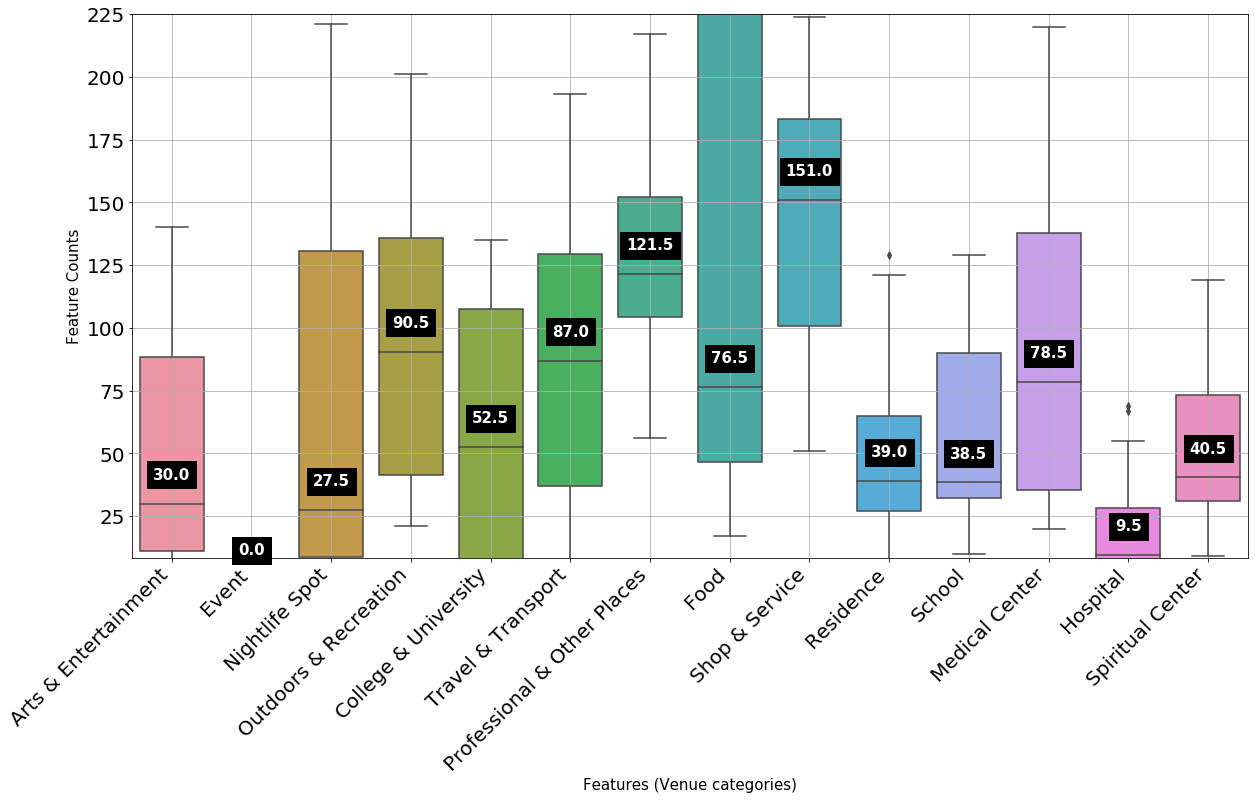

In [34]:
plt.figure(figsize=(20, 10))
data_plt = features_to_analyze[venue_cats_list]
base_limits = (data_plt.min().median(),data_plt.quantile(0.75).max())
ax = sns.boxplot(data = data_plt)
ax.set_ylim(base_limits[0], base_limits[1])
ax.set_ylabel('Feature Counts', fontsize=15)
ax.set_xlabel('Features (Venue categories)', fontsize=15)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.grid()

medians = data_plt.median().values
median_labels = [str(round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in enumerate(ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+base_limits[0], median_labels[tick], 
            horizontalalignment='center', va="bottom", backgroundcolor="black", size='15', color='w', weight='semibold')

plt.savefig(P_select_state+"_venue_feature_counts.png",bbox_inches='tight')    
plt.show()

#### Analysis

Ref: White Paper

#### 7.1.2.2 Visualize non-nenue features

non-venue features follow different scales unlike venue features. They are also expected to be indirect influencers to decision on liveability.

#### Plot: Violin - Non-Venue Features

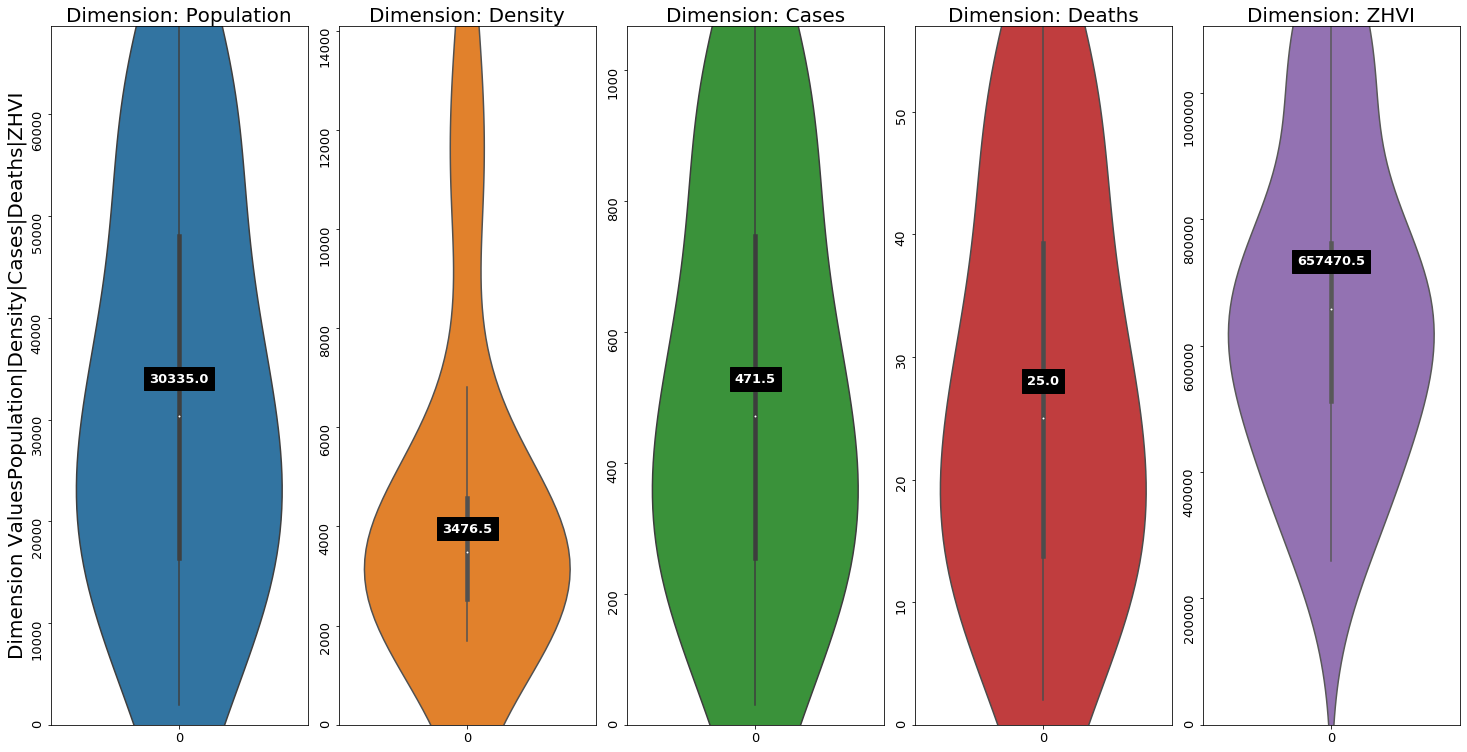

In [35]:
data = features_to_analyze
plots = non_venue_list
data = data[plots]
dimensions = data.columns

fig, axes = plt.subplots(1,len(dimensions), figsize=(20, 10), sharey=False)
fig.tight_layout(pad=0)

ylabel = "|".join(dimensions)
axes[0].set_ylabel('Dimension Values'+ylabel, fontsize=20)
#plt.set_xlabel('Venue category', fontsize='x-large')

colors = sns.color_palette(n_colors=5).as_hex()

for k,d in enumerate(dimensions):
    data_plt = data[d]
    #Set same y axis limits
    axes[k].set_ylim(0,data_plt.quantile(1.0))
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Dimension: ' + d, color='black',fontsize=20)
    axes[k].tick_params(labelsize=13)
    plt.yticks(rotation=90, ha='right')
    plt.sca(axes[k])

#     sns.boxplot(data = data_plt, ax=axes[k], color=colors[k])
#     sns.swarmplot(ax=axes[k], data=data_plt, color="yellow")
    sns.violinplot( ax=axes[k], data=data_plt, color=colors[k])

#     plt.grid(True)

#     medians = data_plt.median().values
    medians = data_plt.median()
    median_labels = medians

    axes[k].text(0, medians*1.1, median_labels, 
            horizontalalignment='center', va="bottom", backgroundcolor="black", size='13', color='w', weight='semibold')

plt.savefig(P_select_state+"_non_venue_features.png",bbox_inches='tight')       
plt.show()

#### Analysis

Ref: White Paper

## 7.2 Evaluate for best k value

Inertia: It is the sum of squared distances of samples to their closest cluster center.

Iterate through values of k from 1 to 10 and calculate inertia for each value of k in the given range.

### 7.2.1 Initialize featue matrix

In [36]:
#drop ZIP to create a features only datframe/matrix
features_to_cluster_method = features_to_analyze[venue_cats_list]

print("Shape of scaled features matrix to be used for elbow determination: ", features_to_cluster_method.shape)
features_to_cluster_method.tail()

Shape of scaled features matrix to be used for elbow determination:  (20, 14)


,Arts & Entertainment,Event,Nightlife Spot,Outdoors & Recreation,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
15,11,0,24,42,2,28,105,74,154,8,33,29,3,35
16,4,0,0,21,5,12,126,28,77,11,33,23,0,44
17,11,0,2,31,8,22,126,34,102,33,29,40,4,40
18,119,0,38,103,18,87,114,102,59,42,25,37,4,11
19,5,0,3,24,7,6,107,34,87,13,30,23,6,17


### 7.2.2 Normalize data using MinMax Scaler

#### Table: scaled_df

In [37]:
# scaled = StandardScaler().fit_transform(features_to_cluster_method)
scaled = MinMaxScaler().fit_transform(features_to_cluster_method)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = venue_cats_list

print("Shape of scaled dataset for clustering: ", scaled_df.shape)
scaled_df.head()

Shape of scaled dataset for clustering:  (20, 14)


,Arts & Entertainment,Event,Nightlife Spot,Outdoors & Recreation,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
0,0.594203,0.8,0.719457,0.800000,0.789474,0.828877,0.596273,1.000000,0.774566,0.834711,0.815126,0.310,0.507246,0.927273
1,0.224638,0.0,0.144796,0.438889,0.413534,0.577540,0.279503,0.107296,0.589595,0.314050,0.411765,0.180,0.043478,0.281818
2,0.260870,0.0,0.203620,0.544444,0.060150,0.572193,0.627329,0.399142,0.566474,0.380165,0.336134,0.445,0.188406,0.509091
3,0.992754,0.6,0.696833,0.883333,0.969925,0.844920,0.981366,0.991416,0.791908,0.661157,0.773109,0.810,0.666667,0.681818
4,0.985507,1.0,1.000000,1.000000,0.939850,0.903743,0.956522,0.969957,1.000000,1.000000,1.000000,0.990,0.971014,1.000000


### 7.2.3 Visualize normalized feature matrix

#### Plot: Box - Venue Features Normalized/Standardized

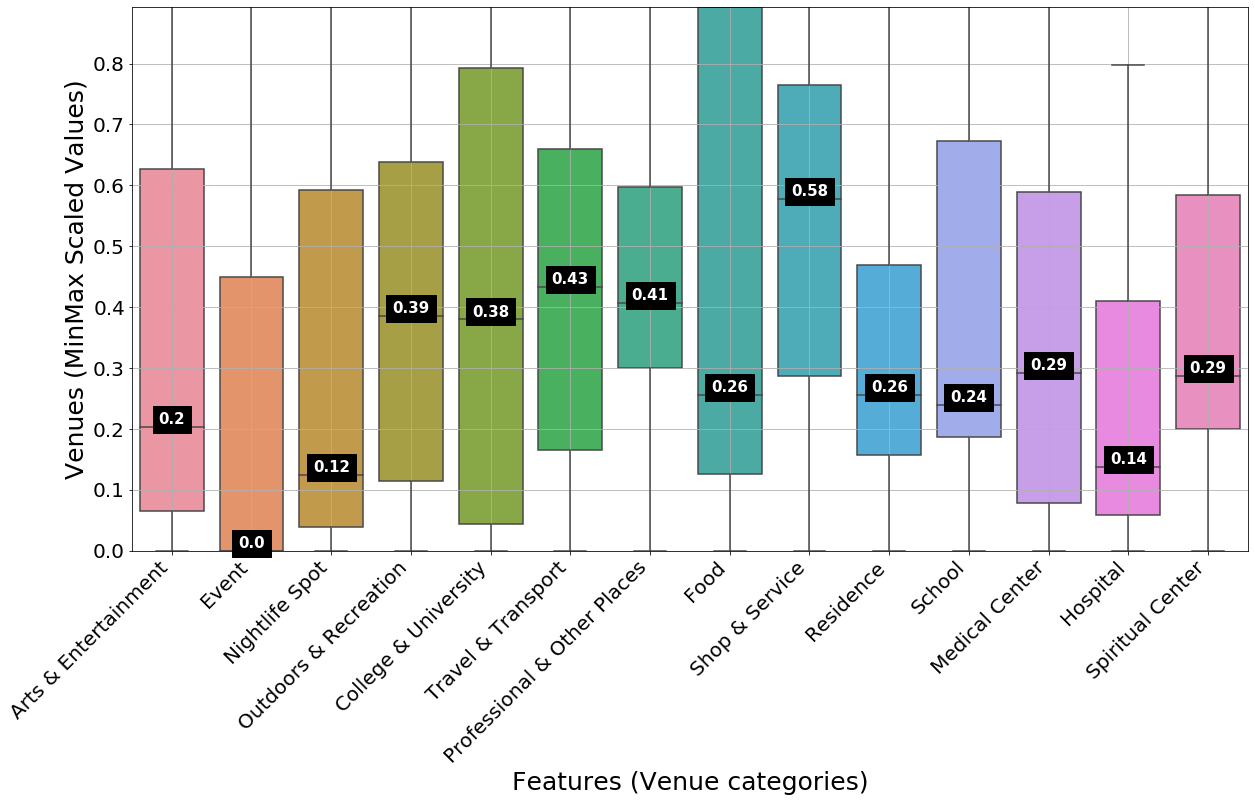

In [38]:
plt.figure(figsize=(20, 10))

base_limits = (scaled_df.min().median(), scaled_df.quantile(0.75).max())
ax = sns.boxplot(data = scaled_df)
ax.set_ylim(base_limits[0], base_limits[1])
ax.set_ylabel('Venues (MinMax Scaled Values)', fontsize=25)
ax.set_xlabel('Features (Venue categories)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.grid()

medians = scaled_df.median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in enumerate(ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + base_limits[0], median_labels[tick], 
            horizontalalignment='center', va="bottom", backgroundcolor="black", size='15', color='w', weight='semibold')
    
    
plt.savefig(P_select_state+"_features-minmaxscaler.png",bbox_inches='tight') 
plt.show()

#### Analysis

Ref: White Paper

### 7.2.4 Calculate Inertia - kMeans

In [39]:
inertia = [] 

X = scaled_df
K = range(1,11)
for k in K:
    #kmean model
    Model = KMeans(n_clusters=k).fit(X)
    Model.fit(X)

    inertia.append(Model.inertia_)

#### Plot: Line - Elbow Method - kMeans Inertia

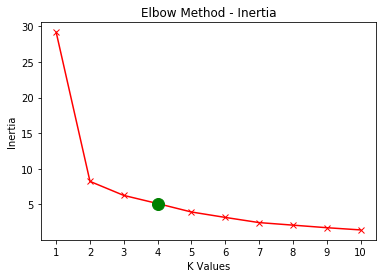

In [40]:
plt.plot(K, inertia, 'rx-')
plt.title('Elbow Method - Inertia')
plt.xticks(K)
plt.ylabel('Inertia')
plt.xlabel('K Values') 

plt.plot(4, inertia[3], 'go-',markersize=12)

plt.savefig(P_select_state+"_kmeans_inertia.png",bbox_inches='tight')

plt.show() 

#### Analysis

Ref: White Paper

## 7.3 Build Clusters

### 7.3.1 Clusters - kMeans

Derive Cluster array by running kMeans clustering algorithm.

In [41]:
# set number of clusters from the above elbow curve k = 4
num_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
cluster_labels = kmeans.labels_[:]
len(cluster_labels)

20

Combine Clusters with original features matrix. Pull additional data like ZIP and geographic details from SELECT dataframe.

In [42]:
analysis_df = features_to_analyze.copy()
analysis_df.insert(0, 'Clusters', cluster_labels)
header_columns = ["ZIP","Latitude", "Longitude", "City","State","County"]
analysis_df = analysis_df.join(SELECT_df[header_columns].set_index('ZIP'), on='ZIP').reset_index(drop=True)
analysis_df = analysis_df[["Clusters"]+header_columns+full_list]

print("Shape of features dataframe after adding clustering: ", analysis_df.shape)
analysis_df.tail()

Shape of features dataframe after adding clustering:  (20, 26)


,Clusters,ZIP,Latitude,Longitude,City,State,County,Arts & Entertainment,Event,Nightlife Spot,...,Residence,School,Medical Center,Hospital,Spiritual Center,Population,Density,Cases,Deaths,ZHVI
15,0,20018,38.92612,-76.97272,Washington,DC,Washington,11,0,24,...,8,33,29,3,35,19943,2160,310,16,581582
16,0,20019,38.89180,-76.94270,Washington,DC,Washington,4,0,0,...,11,33,23,0,44,62625,3353,974,52,373846
17,0,20020,38.86160,-76.97529,Washington,DC,Washington,11,0,2,...,33,29,40,4,40,56131,4175,873,46,390491
18,2,20024,38.87826,-77.02758,Washington,DC,Washington,119,0,38,...,42,25,37,4,11,13354,1700,208,11,517534
19,0,20032,38.83438,-77.00673,Washington,DC,Washington,5,0,3,...,13,30,23,6,17,42930,2622,668,35,340476


## 7.4 Analyze Clusters

### 7.4.1 Cluster Legend and Counts

#### Table: cluster_legend

In [43]:
cluster_legend = pd.DataFrame(analysis_df.groupby(["Clusters"]).count()["ZIP"].copy())
cluster_legend.sort_values(by = ["ZIP"], ascending=False, inplace=True)
rainbow = P_rainbow
print(rainbow)
cluster_legend.insert(loc=0, column='Color', value= rainbow[:num_clusters])
cluster_legend.sort_values(by = ["Clusters"], ascending=True, inplace=True)
rainbow = list(cluster_legend["Color"])
print(rainbow)
cluster_legend

['Red', 'Orange', 'Green', 'Blue', 'Yellow', 'Brown', 'Black', 'Purple']
['Red', 'Green', 'Orange', 'Blue']


,Color,ZIP
Clusters,,
0,Red,7
1,Green,3
2,Orange,7
3,Blue,3


### 7.4.2 Visualize Clusters - Geographic

#### Plot: Map - Clusters on a Map

In [44]:
# create map
main_latitude = round((analysis_df["Latitude"].max()+analysis_df["Latitude"].min())/2,4)
main_longitude = round((analysis_df["Longitude"].max()+analysis_df["Longitude"].min())/2,4)
map_clusters = folium.Map(location=[main_latitude, main_longitude], zoom_start= P_default_zoom)

x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]

# add markers to the map
for x in analysis_df.iterrows():  
    lat = x[1]["Latitude"]
    lon = x[1]["Longitude"]
    city = x[1]["City"]
    zip = x[1]["ZIP"]
    cluster = x[1]["Clusters"]
    county = x[1]["County"]
    label = folium.Popup("City: "+city+" \n"+str(zip)+"\n"+"County: "+county + 'Cluster ' + str(cluster)+" "+rainbow[cluster], parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius= P_circle_marker_radius,
        popup=label,
        color= rainbow[cluster],
        fill=True,
        fill_color= rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)   

map_clusters.save(P_select_state+"_map_clusters.png")    
    
map_clusters

#### Analysis

Ref: White Paper

### 7.4.3 Compare Clusters by Venues

#### Plot: Box - Compare Venue Spread by Cluster

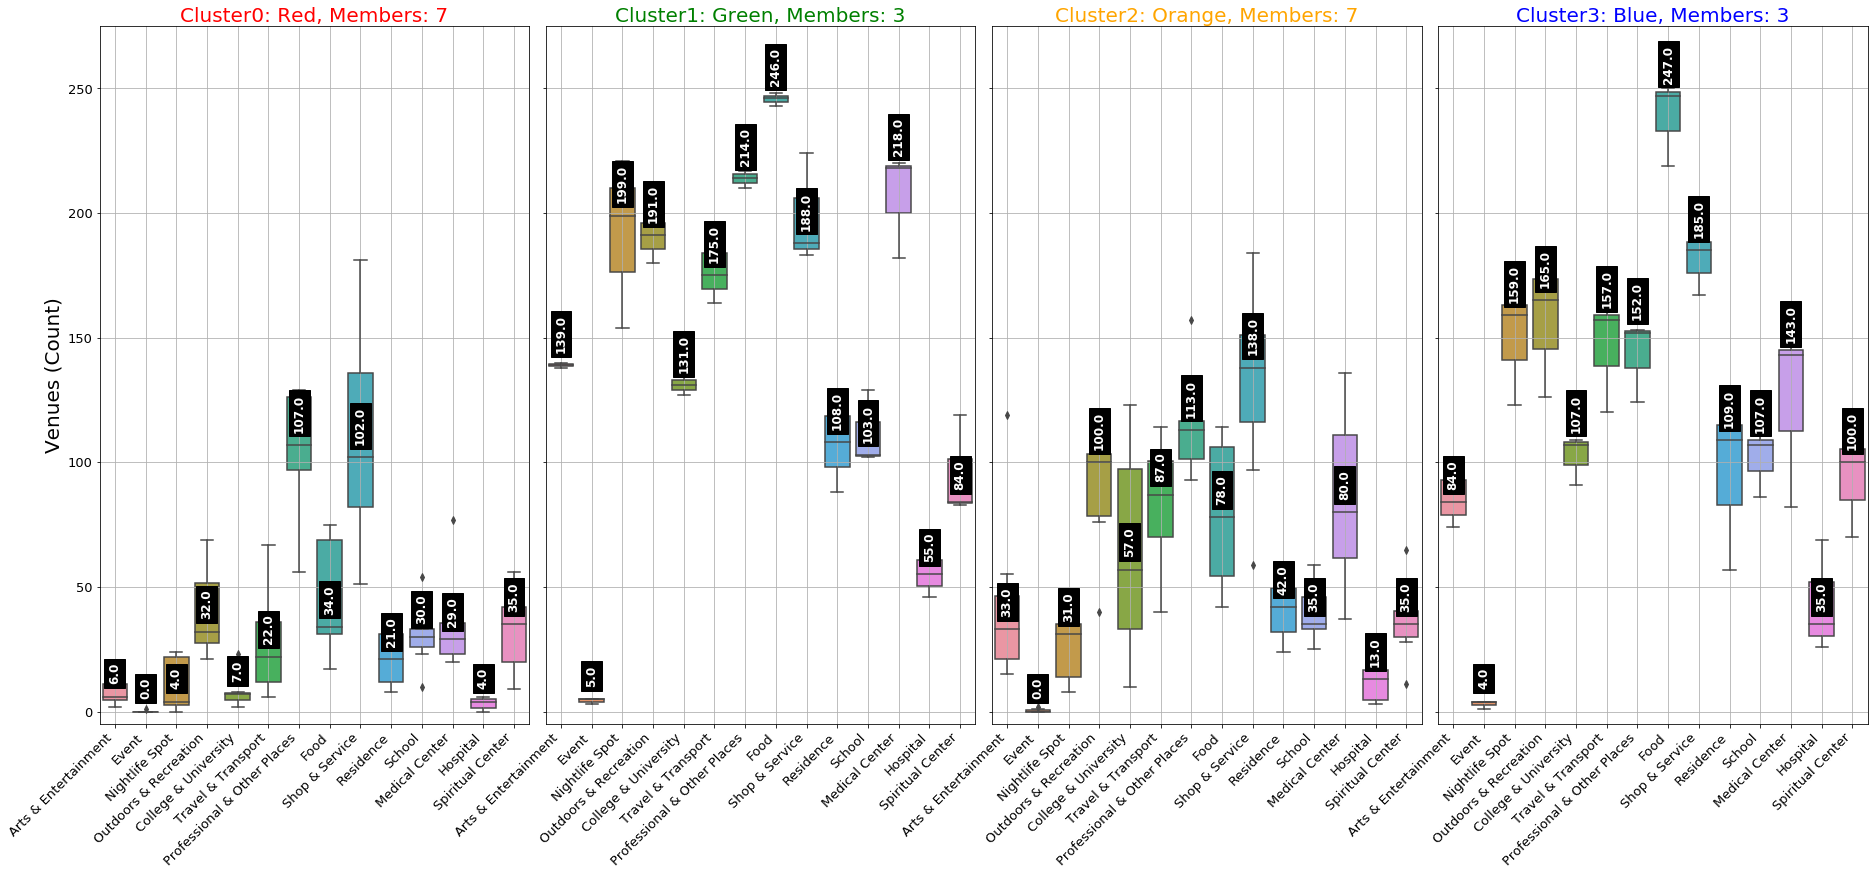

In [45]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,num_clusters, figsize=(25, 10), sharey=True)
fig.tight_layout(pad=0.05)

axes[0].set_ylabel('Venues (Count)', fontsize=20)

data = analysis_df[["Clusters"]+venue_cats_list]

for k in range(num_clusters):
    #Set same y axis limits
    
    current_axis = axes[k]
      
    current_axis.set_ylim(-5,275)
    current_axis.xaxis.set_label_position('top')
    current_axis.set_xlabel('Cluster' + str(k)+": "+cluster_legend.loc[k]['Color']+", Members: "+str(cluster_legend.loc[k]['ZIP']), color=cluster_legend.loc[k]['Color']
                            ,fontsize=20)
    current_axis.tick_params(labelsize=13)
    plt.sca(current_axis)
#     plt.xticks(rotation='vertical')
    plt.xticks(rotation=45, ha='right')
    data_plt = data[data['Clusters'] == k].drop('Clusters',1)
    sns.boxplot(data = data_plt, ax=current_axis)
#     sns.swarmplot(ax=axes[k], data=data_plt, color="grey")
    plt.grid(True)

    medians = data_plt.median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    labels_xtick = current_axis.get_xticklabels()
    for tick, label in enumerate(labels_xtick):
        current_axis.text(pos[tick], medians[tick] + 5, median_labels[tick], 
            horizontalalignment='center', va='bottom', rotation='vertical',size='12', backgroundcolor = "black",color='w', weight='semibold')
    
    
plt.savefig(P_select_state+"_compare_venue_clusters.png",bbox_inches='tight')    
plt.show()

#### Analysis

Ref: White Paper

#### Plot: Spider - Compare Median Venues by Cluster 1

In [46]:
summary_clusters = analysis_df[["Clusters"]+venue_cats_list].groupby("Clusters").median()
summary_clusters = summary_clusters.reset_index()
summary_clusters

,Clusters,Arts & Entertainment,Event,Nightlife Spot,Outdoors & Recreation,College & University,Travel & Transport,Professional & Other Places,Food,Shop & Service,Residence,School,Medical Center,Hospital,Spiritual Center
0,0,6,0,4,32,7,22,107,34,102,21,30,29,4,35
1,1,139,5,199,191,131,175,214,246,188,108,103,218,55,84
2,2,33,0,31,100,57,87,113,78,138,42,35,80,13,35
3,3,84,4,159,165,107,157,152,247,185,109,107,143,35,100


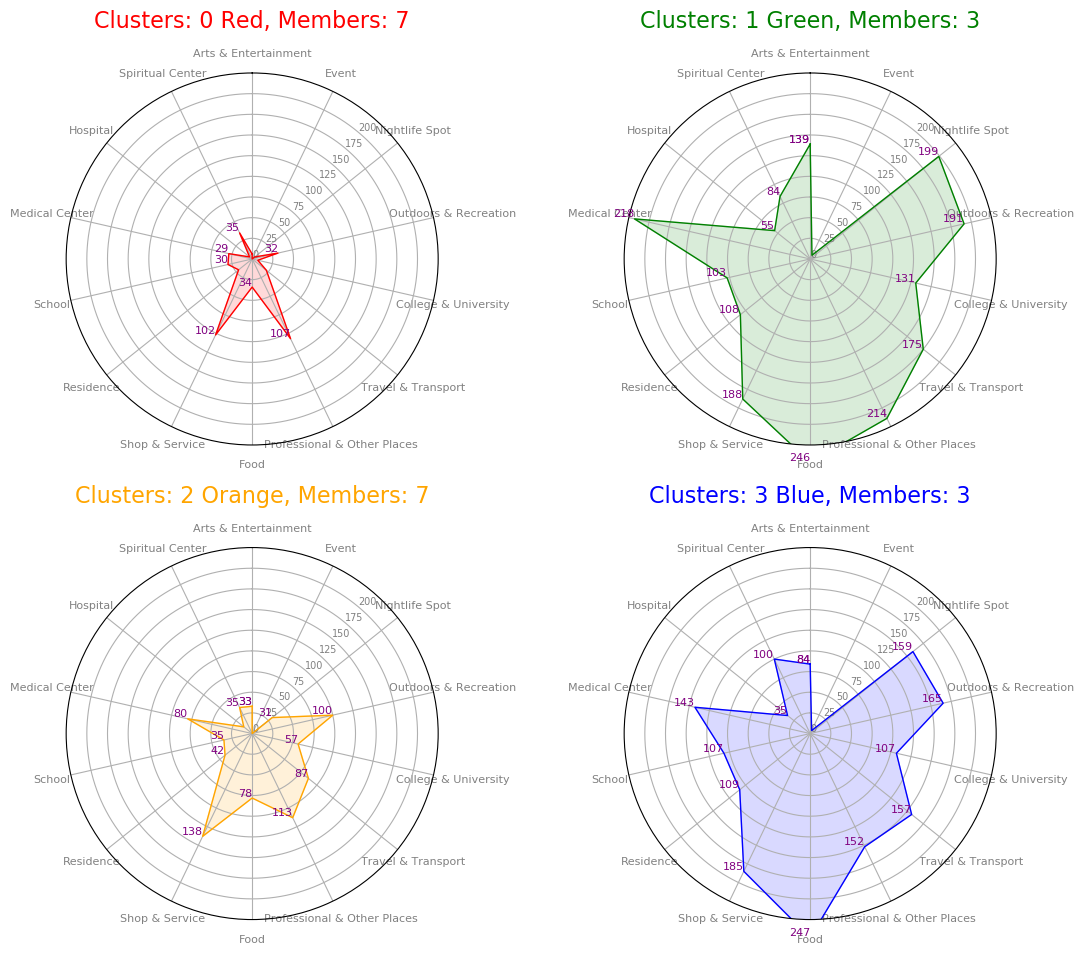

In [47]:
df = summary_clusters
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

 
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
#     plt.subplots_adjust(left=0, bottom=0, right=0, top=0, wspace=0, hspace=0)
    plt.subplots_adjust(wspace=0.5,hspace=0.1)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8, wrap=True,ha='center')
 
    # Draw ylabels
    ax.set_rlabel_position(40)
    yscale = list(np.arange(0,225,25))
    plt.yticks(yscale, [str(round(x,2)) for x in yscale], color="grey", size=7)
    plt.ylim(0,225)
 
    # Ind1
    values=df.loc[row].drop('Clusters').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.15)
    for i, v in enumerate(values):
        value = round(v,2)
        if value > 25:
            ax.text(angles[i], v, round(v,2), 
            ha='right', va='bottom',size='8',color='purple', weight='medium')
    
 
    # Add a title
    plt.title(title, size=16, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Clusters: '+str(df['Clusters'][row])+" "+cluster_legend.loc[row]['Color']+", Members: "+str(cluster_legend.loc[row]['ZIP']), color=rainbow[row])

plt.savefig(P_select_state+"_2X2spider_compare_venue_clusters.png",bbox_inches='tight')     

#### Plot: Spider - Compare Median Venues by Cluster 2

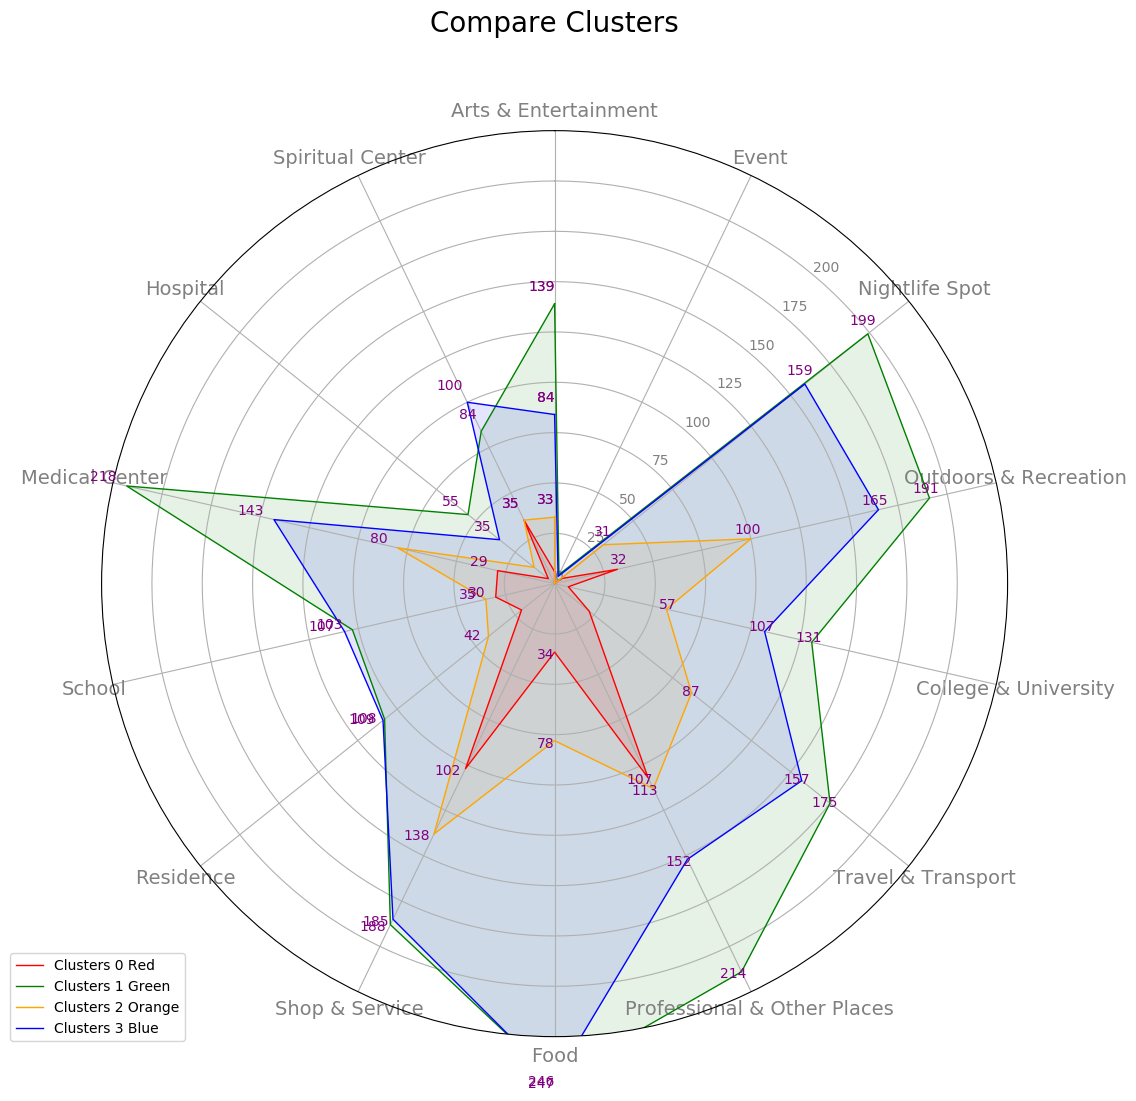

In [48]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

my_dpi=100
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)


 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=14, wrap=True,ha='center')
 
# Draw ylabels
ax.set_rlabel_position(40)
yscale = list(np.arange(0,225,25))
plt.yticks(yscale, [str(round(x,2)) for x in yscale], color="grey", size=10)
plt.ylim(0,225)
 
 
# ------- PART 2: Add plots

# Add a title
plt.title("Compare Clusters", size=20, color='black', y=1.1)

for row in range(0, len(df.index)):

    values=df.loc[row].drop('Clusters').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=rainbow[row], linewidth=1, linestyle='solid', label='Clusters '+str(df['Clusters'][row])+" "+cluster_legend.loc[row]['Color'])
    ax.fill(angles, values, rainbow[row], alpha=0.1)
    for i, v in enumerate(values):
        value = round(v,2)
        if value > 25:
            ax.text(angles[i], v+5, round(v,2), 
            ha='right', va='bottom',size='10',color='purple', weight='medium')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig(P_select_state+"_spider_compare_venue_clusters.png",bbox_inches='tight')
plt.show()

#### Analysis

Ref: White Paper

#### Plot: Violin - Compare von-Venue Features across Clusters

In [49]:
def clusters_to_columns(df):
    data = df #features_clustered[["Clusters"]+non_venue_features_list]
    new = pd.DataFrame(columns = ["Dimensions", "Clusters"]+["Cluster"+ str(k) for k in np.sort(df["Clusters"].unique())])
    temp={}
    for row in data.iterrows():
        temp = {}
        cluster_col = "Cluster"+str(row[1]["Clusters"])
        temp["Clusters"] = row[1]["Clusters"]
        for cell in row[1].index:
            if cell == "Clusters":
                continue
            temp["Dimensions"] = cell
            temp[cluster_col]= row[1][cell]
            new = new.append(temp, ignore_index=True)
#     new.fillna(0, inplace=True)
    return new

In [50]:
data=0 # Reset data
data = clusters_to_columns(analysis_df[["Clusters"]+non_venue_list])
plots = [x for x in list(data.columns) if x not in ["Clusters"]]
data = data[plots]
dimensions = data["Dimensions"].unique()

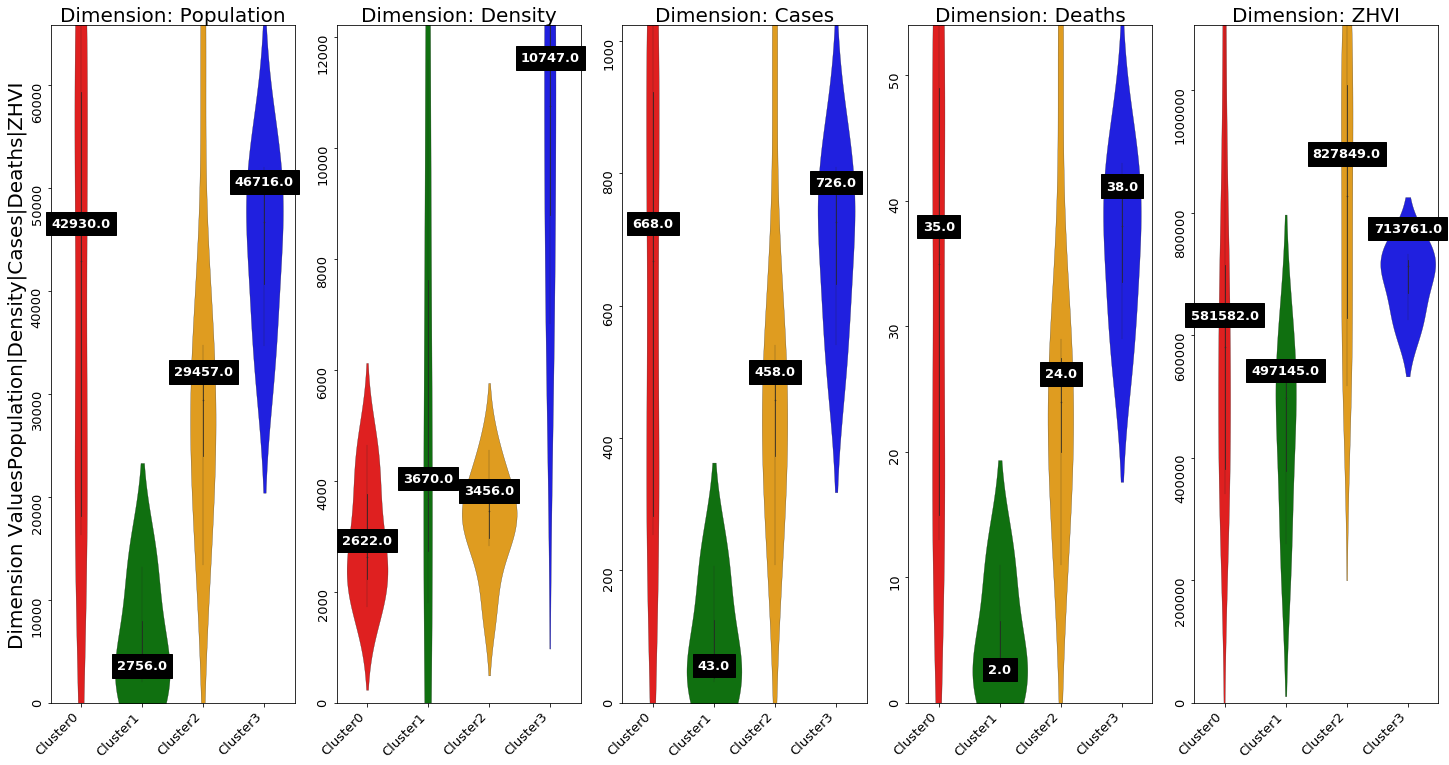

In [51]:
fig, axes = plt.subplots(1,len(dimensions), figsize=(20, 10), sharey=False)
fig.tight_layout()

ylabel = "|".join(dimensions)
axes[0].set_ylabel('Dimension Values'+ylabel, fontsize=20)

my_palette={}
for cluster, color in cluster_legend["Color"].to_dict().items():
    my_palette["Cluster"+str(int(cluster))] = color

for k,d in enumerate(dimensions):
    data_plt = data[data['Dimensions'] == d].drop('Dimensions',1)
    #Set same y axis limits
    axes[k].set_ylim(0,data_plt.max().quantile(0.75))
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Dimension: ' + d, color='black',fontsize=20)
    axes[k].tick_params(labelsize=13)
    plt.sca(axes[k])
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=90, ha='right')
#     sns.boxplot(data = data_plt, ax=axes[k], palette = my_palette)
#     sns.swarmplot(ax=axes[k], data=data_plt, color="grey")
    sns.violinplot( ax=axes[k], data=data_plt, palette=my_palette, linewidth=0.25, width=0.90)

#     plt.grid(True)

    medians = data_plt.median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick,label in enumerate(axes[k].get_xticklabels()):
        axes[k].text(pos[tick], medians[tick]*1.07, median_labels[tick], 
            horizontalalignment='center', va="bottom", backgroundcolor="black", size='13', color='w', weight='semibold')

plt.savefig(P_select_state+"_compare_nonvenue_clusters.png",bbox_inches='tight')       
plt.show()

#### Analysis

Ref: White Paper

# 8. Discussion

This section will build upon “Analysis” listed in above sections. Here is our opportunity to revisit use-cases we created in section 4.1. We will later talk about limitation and improvement opportunities to the above model simulation.

for more ...

Ref: White Paper

# 9. Conclusion

We can use Data Sciences to empower our decisions, as demonstrated above. However, to accomplish our objectives adequate research on the subject matter and a well-defined methodology/roadmap like “idY” are critical. As a part of Coursera Capstone Project requirement (for IBM’s Applied Data Sciences Course), I have tried to present a simple model with limitations. This model can be replicated as a template to execute upon small Data Sciences projects. Simply copy the Jupyter Notebook, Change State to, say “IL”, execute and there you go. Add additional data references. Add better visualizations. Take the sections as guide and fill your own code. Do whatever.

Annexure presents demonstration of the model on additional states – CA, WA, and FL. 

I am grateful to all those references available online to make my task so effortless. I am no Data Scientist or Programmer, but you made it easy for me. 

Thank You All.

# 10. Annexures

## 10.1 Additional Example Analysis

### 10.1.X A few more states

Ref: White Paper

## 10.2 Key References

Ref: White Paper